<a href="https://colab.research.google.com/github/baseerx/Psx-EDA-Pyspark/blob/main/Psx_Eda_Pyspark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
from google.colab import drive
from pyspark.sql import SparkSession
from pyspark.sql.functions import udf,col, min, max,trim,col
from pyspark.sql import functions as F
from pyspark.sql.types import StringType, FloatType
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [22]:
drive.mount('/content/gdrive')


spark = SparkSession.builder \
    .appName("Psx_Data") \
    .getOrCreate()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [23]:
# Define the file paths
file_path= '/content/gdrive/MyDrive/Colab Notebooks/Data/Stock Exchange KSE 100(Pakistan).csv'

df=spark.read.csv(file_path,header=True,inferSchema=True)

df.show()



+---------+---------+---------+---------+---------+-------+-------------+
|     Date|     Open|     High|      Low|    Close| Change|       Volume|
+---------+---------+---------+---------+---------+-------+-------------+
|23-Feb-21|31,722.16|31,800.90|31,597.31|31,626.19| -21.38|  718,191,025|
|22-Feb-21|31,874.78|31,958.58|31,612.55|31,647.57|-203.61|  721,952,658|
|19-Feb-21|31,748.75|31,904.30|31,749.43|31,851.18|  91.36|  694,795,084|
|18-Feb-21|32,049.85|32,104.67|31,745.72|31,759.82|-288.86|  577,837,595|
|17-Feb-21|32,166.21|32,390.77|32,044.01|32,048.68| -93.15|  701,658,181|
|16-Feb-21|31,898.51|32,155.42|31,891.80|32,141.83| 250.03|  514,044,525|
|15-Feb-21|31,695.01|31,959.00|31,552.69|31,891.80| 339.11|  486,340,423|
|12-Feb-21|31,703.25|31,819.14|31,517.21|31,552.69|-151.98|  442,547,019|
|11-Feb-21|32,121.31|32,255.15|31,653.40|31,704.67| -410.7|1,124,724,205|
|10-Feb-21|32,186.99|32,234.98|31,949.20|32,115.37| -51.32|1,011,825,950|
| 9-Feb-21|32,275.59|32,365.63|32,149.

In [24]:
print((df.count(), len(df.columns)))

(3221, 7)


**Cleaning and Preprocessing**

In [25]:
# Define the UDF to remove commas
def remove_punc(x):
    return x.replace(",", "")

# Register the UDF
remove_punc_udf = udf(remove_punc, StringType())

# Apply the UDF to each column except the first and convert to float
for col in df.columns[1:]:
    df = df.withColumn(col, remove_punc_udf(df[col]).cast(FloatType()))

# Show the result
df.show()

+---------+--------+--------+--------+--------+-------+------------+
|     Date|    Open|    High|     Low|   Close| Change|      Volume|
+---------+--------+--------+--------+--------+-------+------------+
|23-Feb-21|31722.16| 31800.9|31597.31|31626.19| -21.38| 7.1819104E8|
|22-Feb-21|31874.78|31958.58|31612.55|31647.57|-203.61| 7.2195264E8|
|19-Feb-21|31748.75| 31904.3|31749.43|31851.18|  91.36| 6.9479507E8|
|18-Feb-21|32049.85|32104.67|31745.72|31759.82|-288.86| 5.7783757E8|
|17-Feb-21|32166.21|32390.77|32044.01|32048.68| -93.15| 7.0165818E8|
|16-Feb-21|31898.51|32155.42| 31891.8|32141.83| 250.03|5.14044512E8|
|15-Feb-21|31695.01| 31959.0|31552.69| 31891.8| 339.11|4.86340416E8|
|12-Feb-21|31703.25|31819.14|31517.21|31552.69|-151.98|4.42547008E8|
|11-Feb-21|32121.31|32255.15| 31653.4|31704.67| -410.7|1.12472422E9|
|10-Feb-21|32186.99|32234.98| 31949.2|32115.37| -51.32|1.01182592E9|
| 9-Feb-21|32275.59|32365.63|32149.63|32166.69| -80.25| 6.6395885E8|
| 8-Feb-21|32393.94|32478.42|32185

In [26]:
df.describe()


DataFrame[summary: string, Date: string, Open: string, High: string, Low: string, Close: string, Change: string, Volume: string]

**Basic Data Analysis - Showing Corelations**



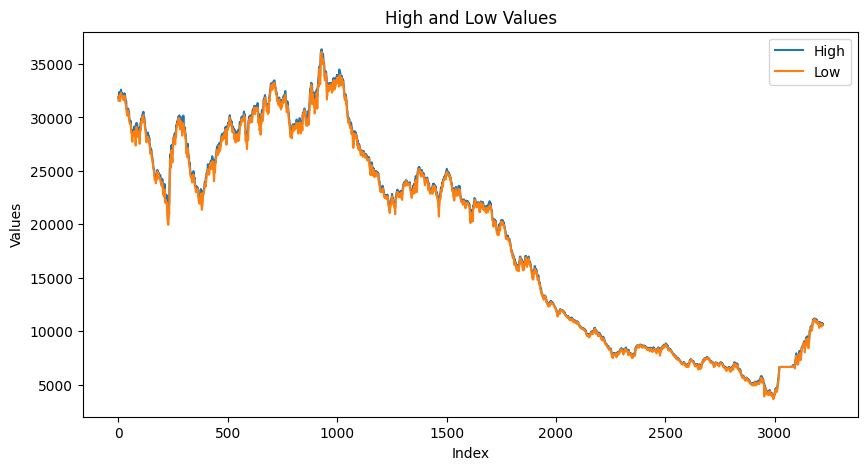

In [27]:
# Convert to Pandas DataFrame
pandas_df = df.toPandas()

# Plot the data
plt.figure(figsize=(10, 5))
plt.plot(pandas_df['High'], label='High')
plt.plot(pandas_df['Low'], label='Low')
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('High and Low Values')
plt.legend()
plt.show()

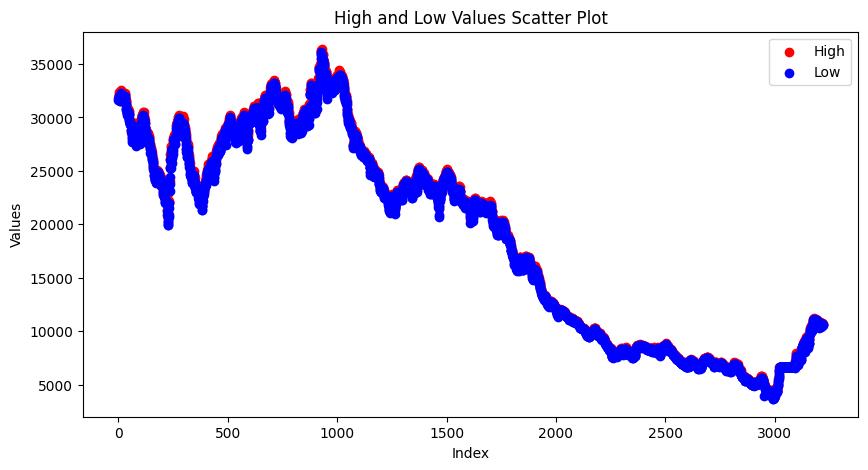

In [28]:
# Plot the data
plt.figure(figsize=(10, 5))
plt.scatter(pandas_df.index, pandas_df['High'], label='High', color='r')
plt.scatter(pandas_df.index, pandas_df['Low'], label='Low', color='b')
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('High and Low Values Scatter Plot')
plt.legend()
plt.show()

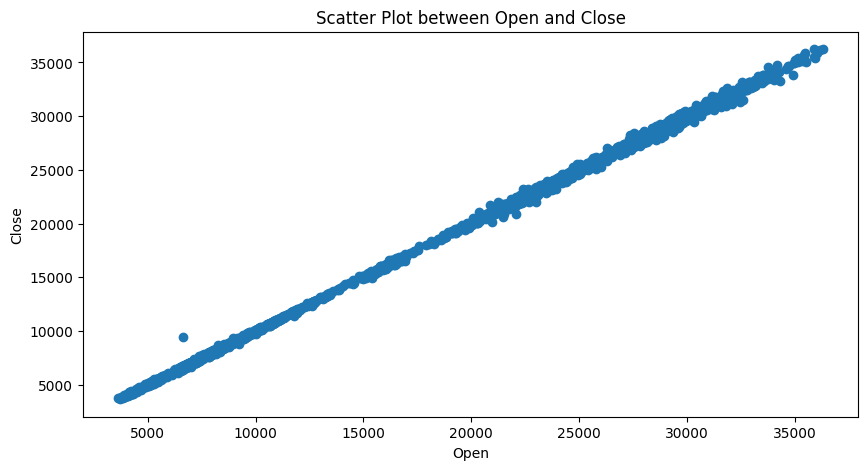

In [29]:
# Plot the data
plt.figure(figsize=(10, 5))
plt.scatter(pandas_df['Open'], pandas_df['Close'])
plt.xlabel('Open')
plt.ylabel('Close')
plt.title('Scatter Plot between Open and Close')
plt.show()

In [30]:
df.show()

+---------+--------+--------+--------+--------+-------+------------+
|     Date|    Open|    High|     Low|   Close| Change|      Volume|
+---------+--------+--------+--------+--------+-------+------------+
|23-Feb-21|31722.16| 31800.9|31597.31|31626.19| -21.38| 7.1819104E8|
|22-Feb-21|31874.78|31958.58|31612.55|31647.57|-203.61| 7.2195264E8|
|19-Feb-21|31748.75| 31904.3|31749.43|31851.18|  91.36| 6.9479507E8|
|18-Feb-21|32049.85|32104.67|31745.72|31759.82|-288.86| 5.7783757E8|
|17-Feb-21|32166.21|32390.77|32044.01|32048.68| -93.15| 7.0165818E8|
|16-Feb-21|31898.51|32155.42| 31891.8|32141.83| 250.03|5.14044512E8|
|15-Feb-21|31695.01| 31959.0|31552.69| 31891.8| 339.11|4.86340416E8|
|12-Feb-21|31703.25|31819.14|31517.21|31552.69|-151.98|4.42547008E8|
|11-Feb-21|32121.31|32255.15| 31653.4|31704.67| -410.7|1.12472422E9|
|10-Feb-21|32186.99|32234.98| 31949.2|32115.37| -51.32|1.01182592E9|
| 9-Feb-21|32275.59|32365.63|32149.63|32166.69| -80.25| 6.6395885E8|
| 8-Feb-21|32393.94|32478.42|32185

In [31]:
df=df.toPandas()


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3221 entries, 0 to 3220
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3221 non-null   object 
 1   Open    3221 non-null   float32
 2   High    3221 non-null   float32
 3   Low     3221 non-null   float32
 4   Close   3221 non-null   float32
 5   Change  3221 non-null   float32
 6   Volume  3221 non-null   float32
dtypes: float32(6), object(1)
memory usage: 100.8+ KB


In [33]:
df.head()

,Date,Open,High,Low,Close,Change,Volume
0,23-Feb-21,31722.160156,31800.900391,31597.310547,31626.189453,-21.379999,718191040.0
1,22-Feb-21,31874.779297,31958.580078,31612.550781,31647.570312,-203.610001,721952640.0
2,19-Feb-21,31748.750000,31904.300781,31749.429688,31851.179688,91.360001,694795072.0
3,18-Feb-21,32049.849609,32104.669922,31745.720703,31759.820312,-288.859985,577837568.0
4,17-Feb-21,32166.210938,32390.769531,32044.009766,32048.679688,-93.150002,701658176.0


**removing spaces from start and end of df values**

In [34]:
# Strip spaces from all values in the DataFrame
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)



In [35]:
pyspark_df = spark.createDataFrame(df)
pyspark_df.show()

+---------+---------------+---------------+---------------+---------------+-------------------+-------------+
|     Date|           Open|           High|            Low|          Close|             Change|       Volume|
+---------+---------------+---------------+---------------+---------------+-------------------+-------------+
|23-Feb-21| 31722.16015625|31800.900390625|31597.310546875|31626.189453125|  -21.3799991607666|  7.1819104E8|
|22-Feb-21|31874.779296875|31958.580078125| 31612.55078125|  31647.5703125|-203.61000061035156|  7.2195264E8|
|19-Feb-21|       31748.75| 31904.30078125|  31749.4296875|  31851.1796875|  91.36000061035156| 6.94795072E8|
|18-Feb-21|32049.849609375|32104.669921875|31745.720703125|  31759.8203125| -288.8599853515625| 5.77837568E8|
|17-Feb-21|  32166.2109375| 32390.76953125|32044.009765625|  32048.6796875|  -93.1500015258789| 7.01658176E8|
|16-Feb-21|31898.509765625|32155.419921875| 31891.80078125|32141.830078125| 250.02999877929688| 5.14044512E8|
|15-Feb-21

In [36]:
from pyspark.sql import SparkSession
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.evaluation import RegressionEvaluator

# Assuming pyspark_df is your DataFrame containing the dataset

# Define the input and output columns
input_col = "High"
output_col = "Low"

# Assemble the features vector
assembler = VectorAssembler(inputCols=[input_col], outputCol="features")
transformed_df = assembler.transform(pyspark_df).select("features", output_col)

# Split the data into training and test sets
train, test = transformed_df.randomSplit([0.8, 0.2])

# Create a LinearRegression instance
lr = LinearRegression(featuresCol="features", labelCol=output_col)

# Fit the model to the training data
model = lr.fit(train)

# Make predictions on the test data
predictions = model.transform(test)

# Evaluate the model
evaluator = RegressionEvaluator(labelCol=output_col, predictionCol="prediction", metricName="r2")
r2 = evaluator.evaluate(predictions)

# Calculate Mean Absolute Error (MAE)
mae = predictions.selectExpr("avg(abs(prediction - Low) / Low)").collect()[0][0]

print("R^2:", r2)
print("MAE:", mae)




R^2: 0.9997144478297564
MAE: 0.006142349936745643


In [37]:
# Define the input column
input_col = "High"

# Create a DataFrame with random values for testing
random_values_df = spark.createDataFrame([(100.0,), (110.0,), (120.0,)], ["High"])

# Assemble the features vector
assembler = VectorAssembler(inputCols=[input_col], outputCol="features")
random_values_with_features = assembler.transform(random_values_df)

# Make predictions using the trained model
predictions = model.transform(random_values_with_features)

# Display the predictions
predictions.select("High", "prediction").show()

+-----+-----------------+
| High|       prediction|
+-----+-----------------+
|100.0|72.73434258889833|
|110.0|82.63317563988849|
|120.0|92.53200869087868|
+-----+-----------------+



In [39]:


# Assuming pyspark_df is your DataFrame containing the dataset

# Define the input and output columns
input_col = "Open"
output_col = "Close"

# Assemble the features vector
assembler = VectorAssembler(inputCols=[input_col], outputCol="features")
transformed_df = assembler.transform(pyspark_df).select("features", output_col)

# Split the data into training and test sets
train, test = transformed_df.randomSplit([0.8, 0.2])

# Create a LinearRegression instance
lr = LinearRegression(featuresCol="features", labelCol=output_col)

# Fit the model to the training data
model = lr.fit(train)

# Make predictions on the test data
predictions = model.transform(test)

# Evaluate the model
evaluator = RegressionEvaluator(labelCol=output_col, predictionCol="prediction", metricName="r2")
r2 = evaluator.evaluate(predictions)

# Calculate Mean Absolute Error (MAE)
mae = predictions.selectExpr("avg(abs(prediction - Close) / Close)").collect()[0][0]

print("R^2:", r2)
print("MAE:", mae)




R^2: 0.9995835206947442
MAE: 0.0069869412357899405
